In [69]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [70]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5, n_clusters_per_class=1)

In [71]:
df = pd.DataFrame(X, columns = ['col1', 'col2', 'col3', 'col4', 'col5'])
df['target'] = y
df.head()

,col1,col2,col3,col4,col5,target
0,-3.431267,-2.474511,-2.016047,1.481759,1.484808,1
1,2.030037,-1.629498,-1.996280,-0.266209,-2.127923,0
2,-0.330164,-1.260305,2.474558,4.003864,0.026963,1
3,0.889007,-0.985317,0.495533,-1.019324,-1.014105,0
4,0.726267,-0.174289,-2.194401,0.786644,-0.783136,0


In [72]:
# function for row sampling
def sample_rows(df, percent):
    return df.sample(int(percent*df.shape[0]), replace = True)

In [73]:
# function for feature sampling
def sample_features(df, percent):
    cols = random.sample(df.columns.tolist()[:-1], int(percent*(df.shape[1])))
    new_df = df[cols]
    new_df['target'] = df['target']
    return new_df

In [74]:
# function for combined sampling
def combined_sampling(df, col_percent, row_percent):
    new_df = sample_rows(df, row_percent)
    return sample_features(new_df, col_percent)

In [75]:
df1 = sample_rows(df, 0.2)
df2 = sample_rows(df, 0.2)
df3 = sample_rows(df, 0.2)

In [76]:
df1.shape

(20, 6)

In [77]:
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [78]:
clf1.fit(df1.iloc[:, 0:5], df1.iloc[:, -1])
clf2.fit(df2.iloc[:, 0:5], df2.iloc[:, -1])
clf3.fit(df3.iloc[:, 0:5], df3.iloc[:, -1])


DecisionTreeClassifier()

[Text(0.6, 0.8333333333333334, 'x[3] <= 0.29\ngini = 0.48\nsamples = 20\nvalue = [12, 8]'),
 Text(0.4, 0.5, 'x[0] <= -1.363\ngini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]')]

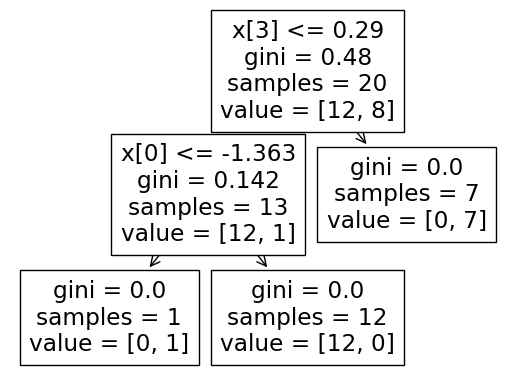

In [79]:
plot_tree(clf1)

[Text(0.4, 0.8333333333333334, 'x[3] <= -0.607\ngini = 0.455\nsamples = 20\nvalue = [13, 7]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.6, 0.5, 'x[0] <= 1.169\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

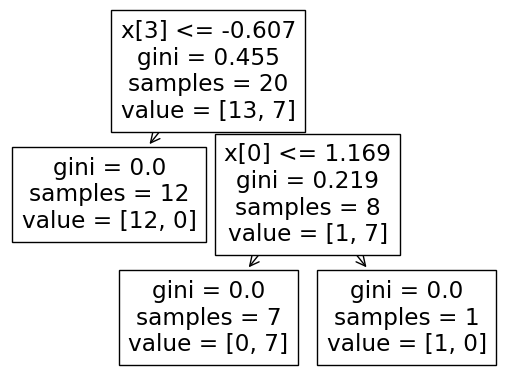

In [80]:
plot_tree(clf2)

[Text(0.4, 0.8333333333333334, 'x[3] <= -0.463\ngini = 0.495\nsamples = 20\nvalue = [9, 11]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.6, 0.5, 'x[2] <= -1.265\ngini = 0.153\nsamples = 12\nvalue = [1, 11]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]')]

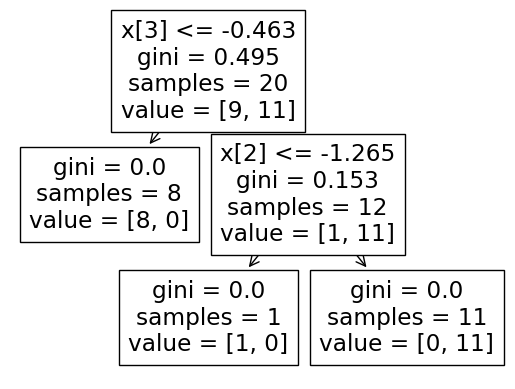

In [81]:
plot_tree(clf3)

In [82]:
clf1.predict(np.array([-3.431267, -2.474511, -2.016047, 1.481759, 1.484808]).reshape(1,5))

C:\Users\Mayank\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [83]:
clf2.predict(np.array([-3.431267, -2.474511, -2.016047, 1.481759, 1.484808]).reshape(1,5))

C:\Users\Mayank\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [84]:
clf3.predict(np.array([-3.431267, -2.474511, -2.016047, 1.481759, 1.484808]).reshape(1,5))

C:\Users\Mayank\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])